In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input/comprehensive-credit-card-transactions-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/comprehensive-credit-card-transactions-dataset/credit_card_transaction_flow.csv


In [2]:
df = pd.read_csv("/kaggle/input/comprehensive-credit-card-transactions-dataset/credit_card_transaction_flow.csv")

In [3]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


# **Cleaning and Stats**

In [4]:
df.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [5]:
# Replace NaN values in 'Gender' with 'Other'
df['Gender'].fillna('Other', inplace=True)

In [6]:
df.isna().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Birthdate             0
Transaction Amount    0
Date                  0
Merchant Name         0
Category              0
dtype: int64

In [7]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,Other,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


In [8]:
# Convert 'Birthdate' and 'Date' columns to datetime
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         50000 non-null  int64         
 1   Name                50000 non-null  object        
 2   Surname             50000 non-null  object        
 3   Gender              50000 non-null  object        
 4   Birthdate           50000 non-null  datetime64[ns]
 5   Transaction Amount  50000 non-null  float64       
 6   Date                50000 non-null  datetime64[ns]
 7   Merchant Name       50000 non-null  object        
 8   Category            50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.4+ MB


In [10]:
# Calculate age from 'Birthdate' and add it as a new column
current_date = datetime.now()
df['Age'] = current_date.year - df['Birthdate'].dt.year

In [11]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21
1,26381,Michelle,Phelps,Other,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72


In [12]:
df['Birth_Month'] = df['Birthdate'].dt.month
df['Birth_Day'] = df['Birthdate'].dt.day

df['Transact_Month'] = df['Date'].dt.month
df['Transact_Day'] = df['Date'].dt.day

df['Match_Birth_Transact'] = ['Yes' if (bm == tm) and (bd == td) else 'No' for bm, bd, tm, td in zip(df['Birth_Month'], df['Birth_Day'], df['Transact_Month'], df['Transact_Day'])]

In [13]:
df

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age,Birth_Month,Birth_Day,Transact_Month,Transact_Day,Match_Birth_Transact
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,10,20,4,3,No
1,26381,Michelle,Phelps,Other,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,10,24,7,17,No
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,10,25,9,20,No
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,10,26,1,11,No
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,11,2,6,13,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market,26,10,21,8,30,No
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic,24,10,21,5,3,No
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market,44,10,26,2,12,No
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market,42,10,25,3,25,No


In [14]:
df["Match_Birth_Transact"].unique()

array(['No'], dtype=object)

well no one has done a transaction on his or her birthdays

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer ID           50000 non-null  int64         
 1   Name                  50000 non-null  object        
 2   Surname               50000 non-null  object        
 3   Gender                50000 non-null  object        
 4   Birthdate             50000 non-null  datetime64[ns]
 5   Transaction Amount    50000 non-null  float64       
 6   Date                  50000 non-null  datetime64[ns]
 7   Merchant Name         50000 non-null  object        
 8   Category              50000 non-null  object        
 9   Age                   50000 non-null  int32         
 10  Birth_Month           50000 non-null  int32         
 11  Birth_Day             50000 non-null  int32         
 12  Transact_Month        50000 non-null  int32         
 13  Transact_Day    

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ

In [17]:
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (50000, 15)


,data type,#missing,%missing,#unique,min,max
Customer ID,int64,0,0.000000,50000,29.000000,999997.000000
Name,object,0,0.000000,690,nan,nan
Surname,object,0,0.000000,1000,nan,nan
Gender,object,0,0.000000,3,nan,nan
Birthdate,datetime64[ns],0,0.000000,58,1948-11-02 00:00:00,2005-10-19 00:00:00
Transaction Amount,float64,0,0.000000,34665,5.010000,2999.880000
Date,datetime64[ns],0,0.000000,287,2023-01-01 00:00:00,2023-10-14 00:00:00
Merchant Name,object,0,0.000000,36939,nan,nan
Category,object,0,0.000000,6,nan,nan
Age,int32,0,0.000000,58,18.000000,75.000000


In [18]:
cols_num = df.select_dtypes(include = ['float','int']).columns.to_list()

for col in cols_num:
    print('==' * 30)
    print(f'Variable: {col}\n')
    print(f'Skew = {df[col].skew()}')
    print(f'Kurtosis = {df[col].kurt()}')
    print('==' * 30)
    print('\n')

Variable: Customer ID

Skew = 0.0012962096469709735
Kurtosis = -1.1986741899351305


Variable: Transaction Amount

Skew = 2.3070093361928206
Kurtosis = 4.764876815612245


Variable: Age

Skew = -0.00562929448318491
Kurtosis = -1.21388819946659


Variable: Birth_Month

Skew = 2.088298592385153
Kurtosis = 2.361085452775963


Variable: Birth_Day

Skew = -1.4935566573439956
Kurtosis = 1.094213270102164


Variable: Transact_Month

Skew = 0.012630256087163881
Kurtosis = -1.1733727814858061


Variable: Transact_Day

Skew = 0.08684092717089256
Kurtosis = -1.190141429881123




# **EDA Begins**

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# What is the distribution of gender among the customers?

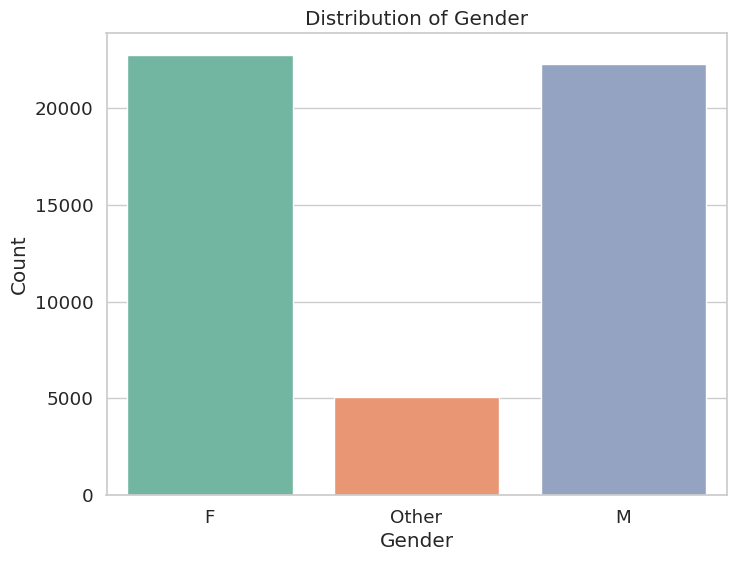

In [20]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# What is the age distribution of the customers?

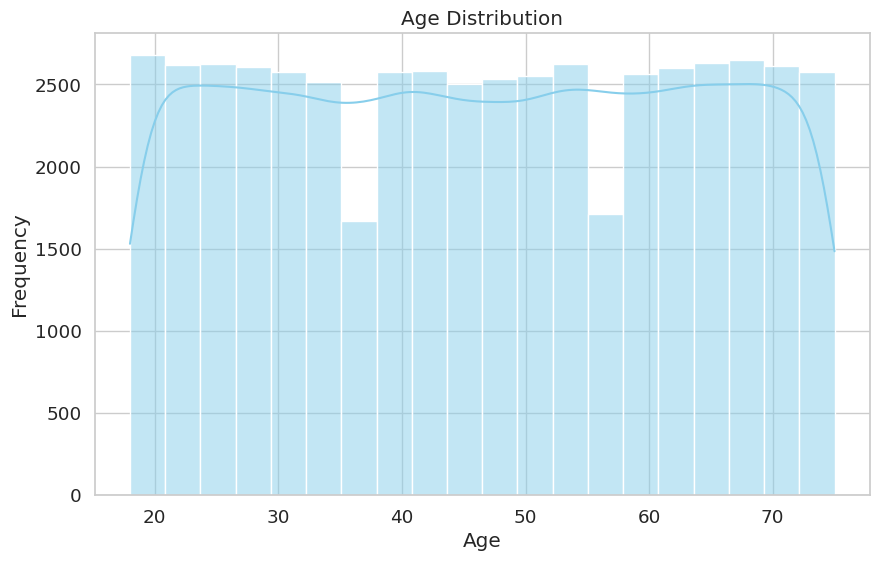

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Which transaction categories are the most common?

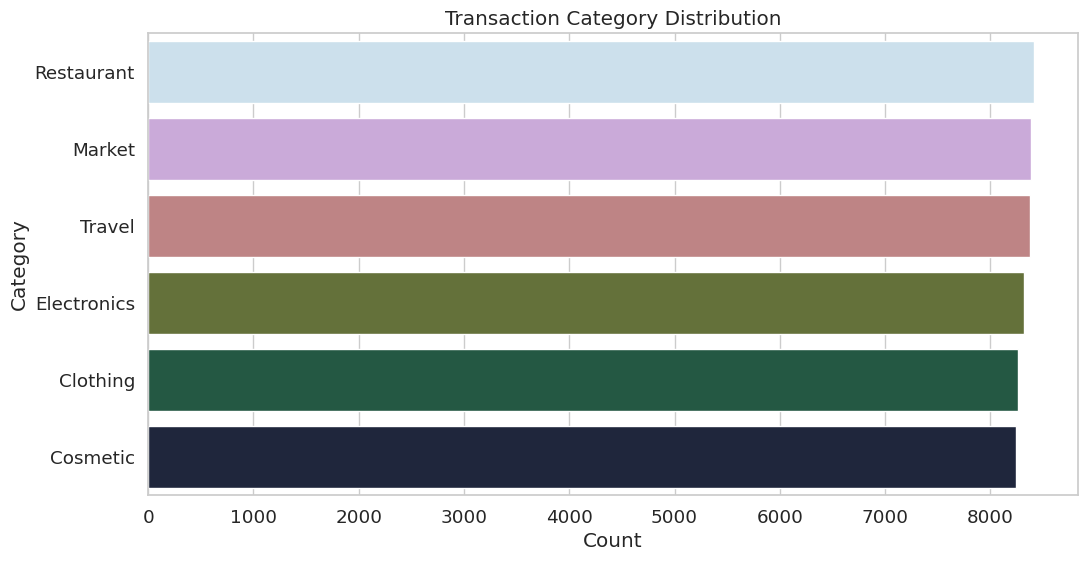

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category', palette='cubehelix_r', order=df['Category'].value_counts().index)
plt.title("Transaction Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# What is the distribution of transaction amounts?

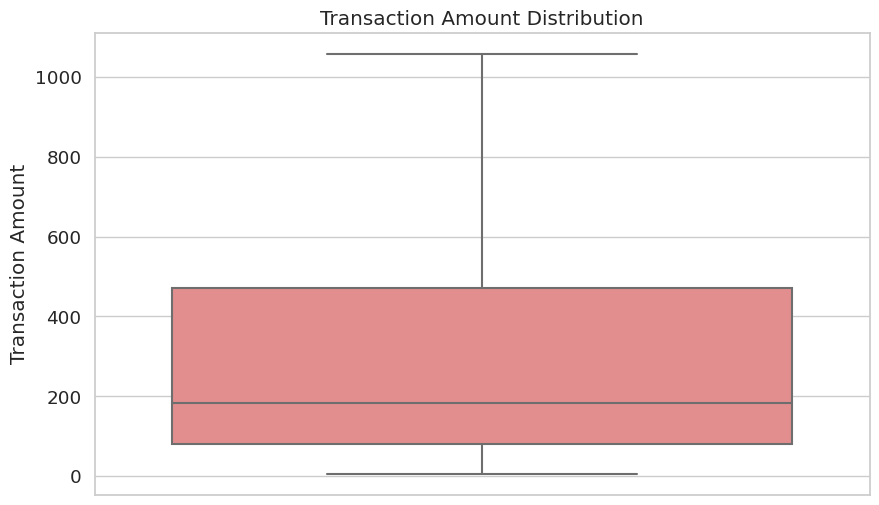

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Transaction Amount', color='lightcoral', showfliers=False)
plt.title("Transaction Amount Distribution")
plt.ylabel("Transaction Amount")
plt.show()

# Is there a relationship between customer age and transaction amount?

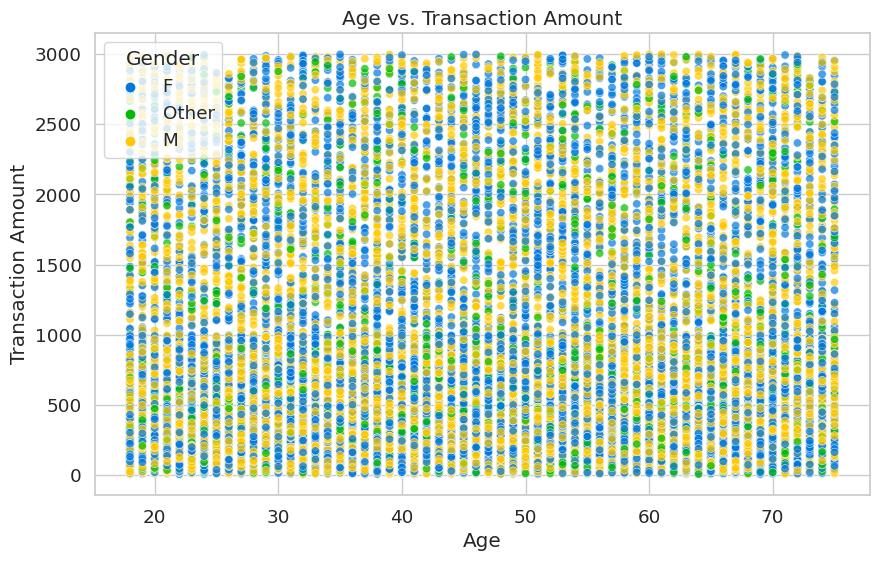

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Transaction Amount', hue='Gender', palette='nipy_spectral', alpha=0.7)
plt.title("Age vs. Transaction Amount")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.legend(title="Gender")
plt.show()

# In which months do most customers have their birthdays?

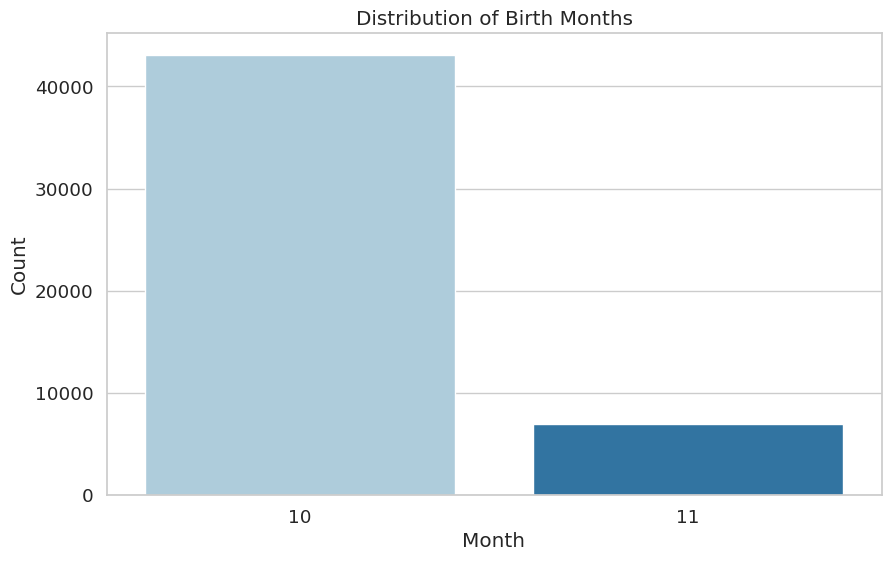

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Birth_Month', palette='Paired')
plt.title("Distribution of Birth Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# In which months are most transactions made?

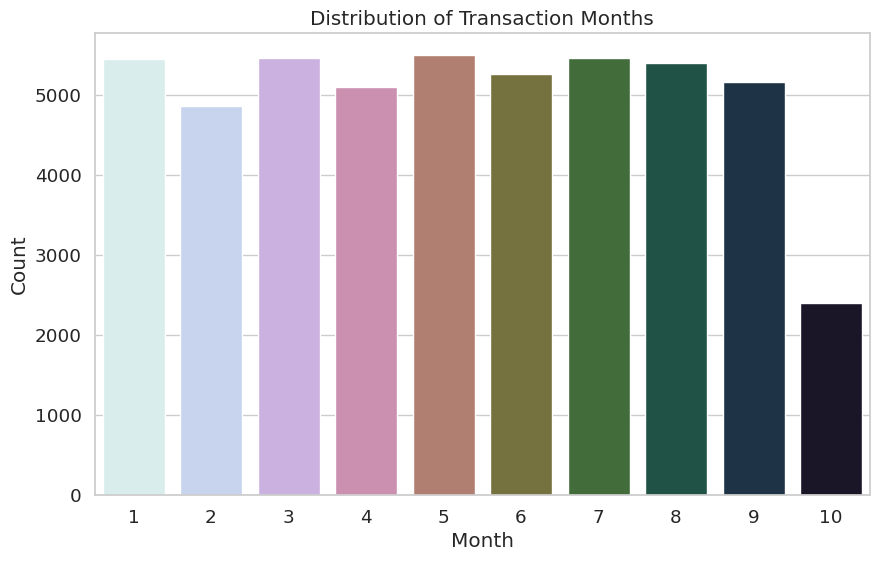

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transact_Month', palette='cubehelix_r')
plt.title("Distribution of Transaction Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# **Customer Segmentation:**

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
data_for_clustering = df[['Age', 'Transaction Amount']]

In [29]:
# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_for_clustering_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


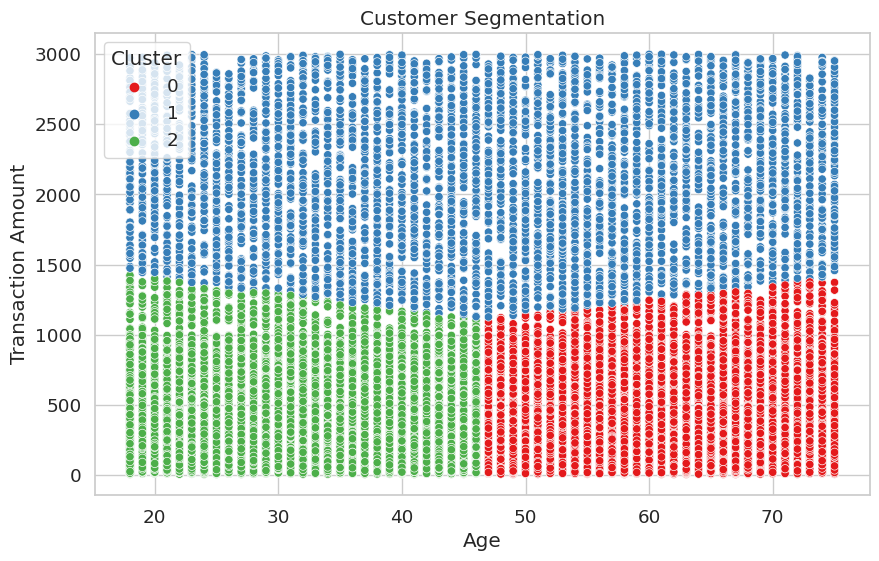

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Transaction Amount', hue='Cluster', palette='Set1')
plt.title("Customer Segmentation")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.show()

# **Time-Series Analysis:**

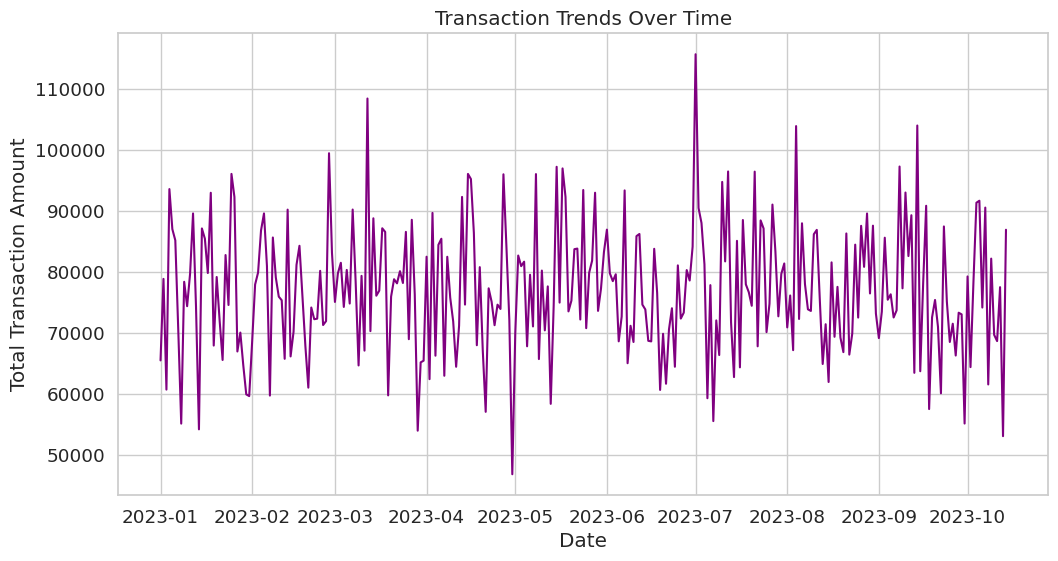

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Transaction Amount', estimator='sum', errorbar=None, color='purple')
plt.title("Transaction Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.show()

# **Customer Age Analysis:**

In [33]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

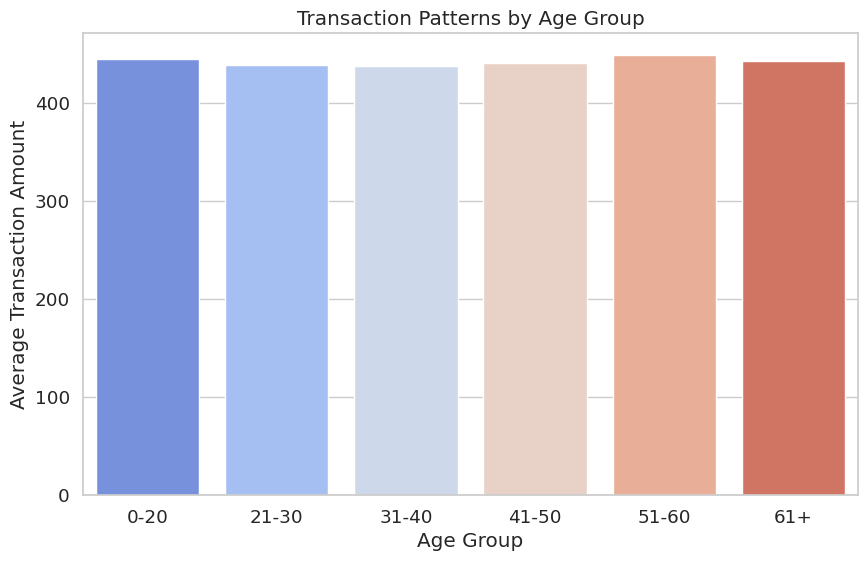

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Transaction Amount', palette='coolwarm', errorbar=None)
plt.title("Transaction Patterns by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Transaction Amount")
plt.show()

# **Gender-Based Analysis:**

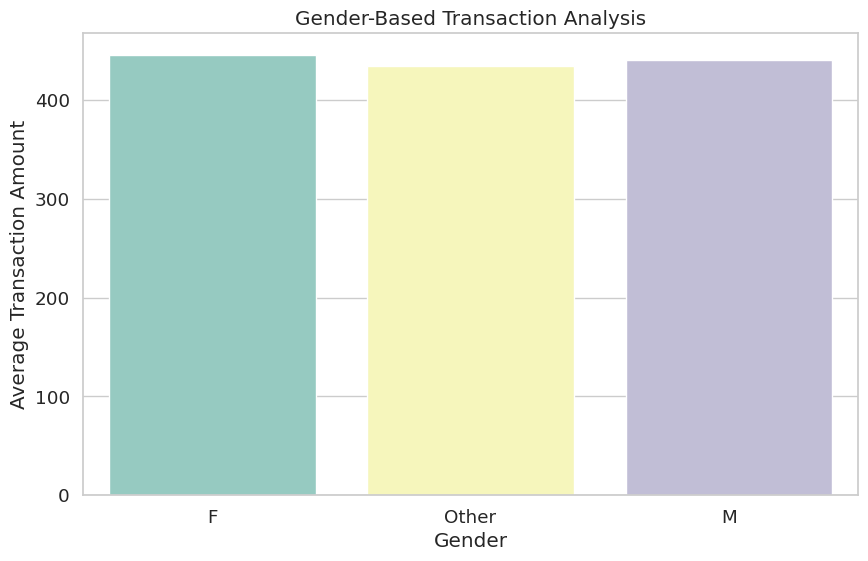

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Transaction Amount', palette='Set3', errorbar=None)
plt.title("Gender-Based Transaction Analysis")
plt.xlabel("Gender")
plt.ylabel("Average Transaction Amount")
plt.show()

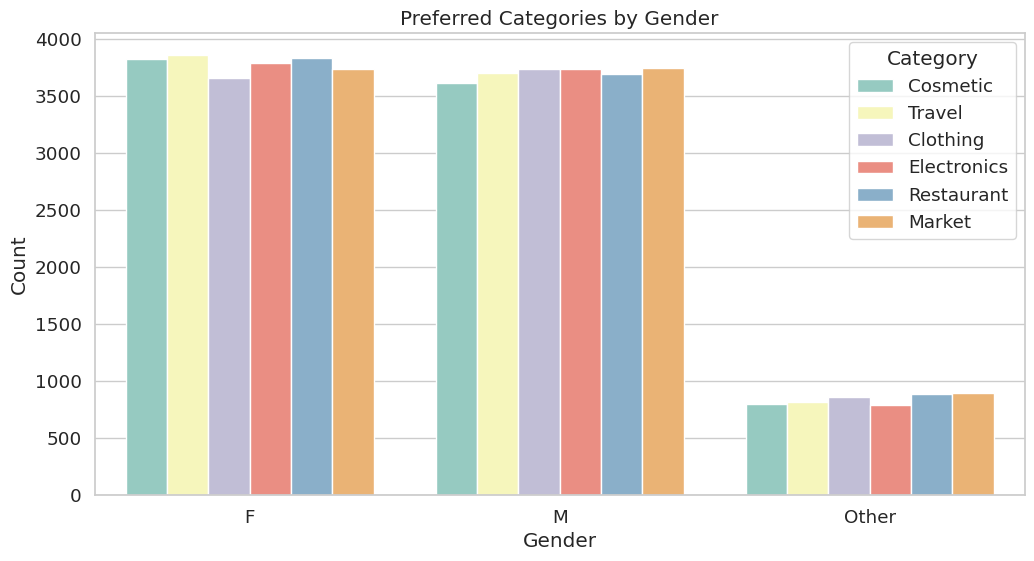

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', hue='Category', palette='Set3', order=df['Gender'].value_counts().index)
plt.title("Preferred Categories by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

# **Hypothesis Testing:**

In [37]:
from scipy.stats import ttest_ind

In [38]:
group1 = df[df['Gender'] == 'M']['Transaction Amount']
group2 = df[df['Gender'] == 'F']['Transaction Amount']

# Performing a two-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

alpha = 0.05  
print("Hypothesis Testing Results:")
print(f"Null Hypothesis (H0): There is no significant difference in the average transaction amount between Male and Female customers.")
print(f"Alternative Hypothesis (H1): There is a significant difference in the average transaction amount between Male and Female customers.")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in the average transaction amount.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in the average transaction amount.")

Hypothesis Testing Results:
Null Hypothesis (H0): There is no significant difference in the average transaction amount between Male and Female customers.
Alternative Hypothesis (H1): There is a significant difference in the average transaction amount between Male and Female customers.
T-statistic: -0.8555189034923589
P-value: 0.3922685039955074
Result: Fail to reject the null hypothesis. There is no significant difference in the average transaction amount.
